In [2]:
import pandas as pd

In [23]:
import plotly

In [24]:
import plotly.express as px

In [3]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/penguins_size.csv')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns


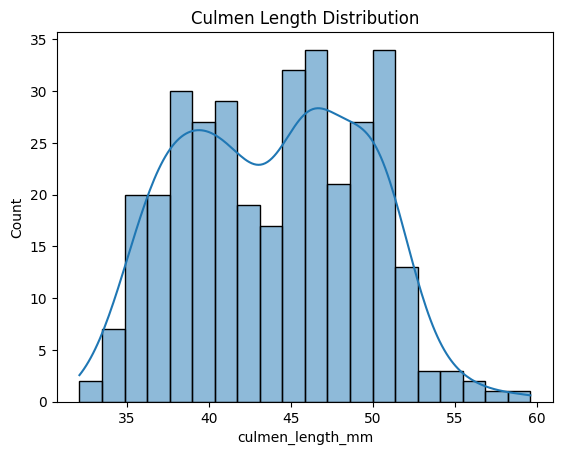

In [6]:
# Univariate Analysis
sns.histplot(data['culmen_length_mm'], bins=20, kde=True)
plt.title('Culmen Length Distribution')
plt.show()


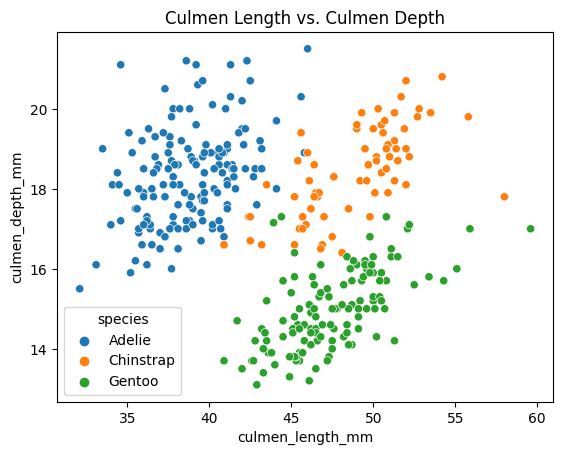

In [27]:
# Bivariate Analysis
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=data, hue='species')
plt.title('Culmen Length vs. Culmen Depth')
plt.show()

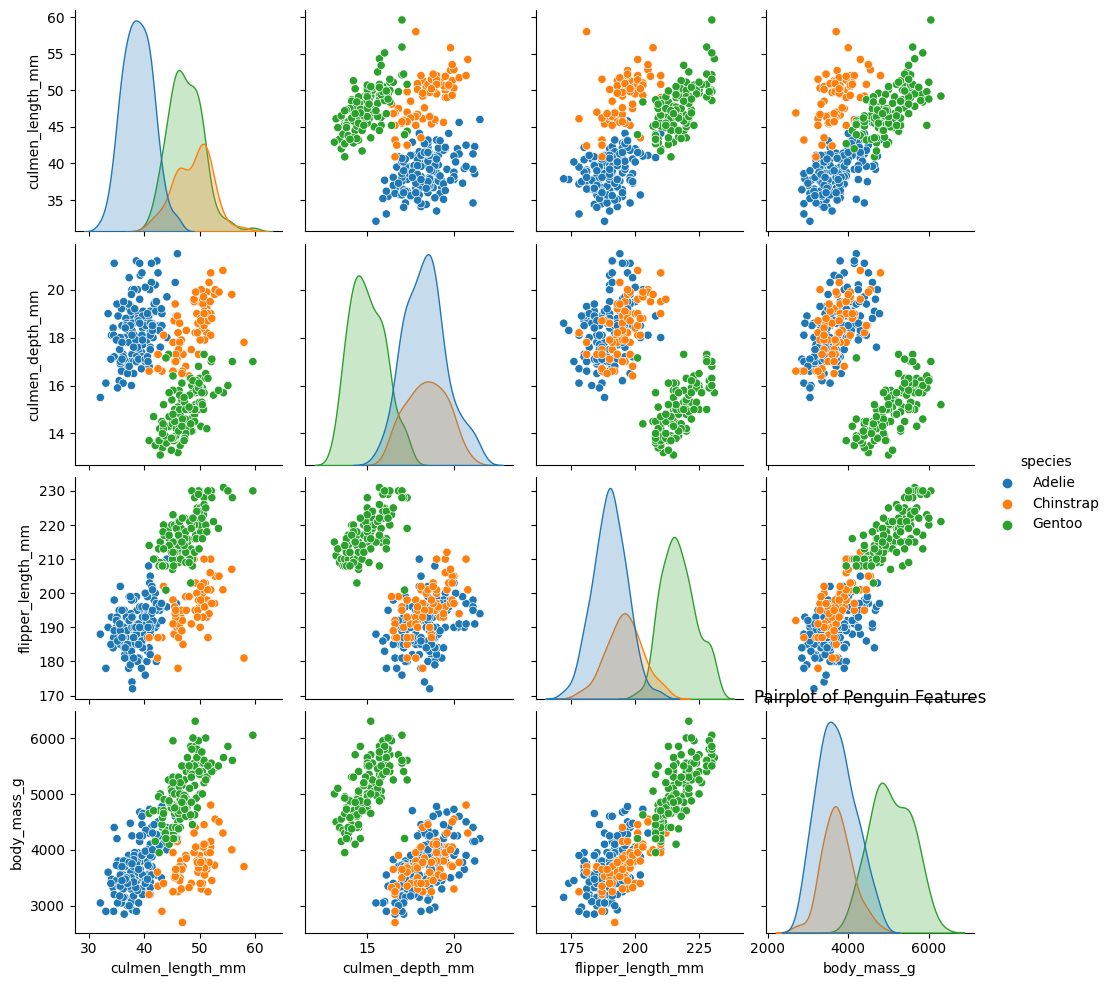

In [39]:
sns.pairplot(data=data, hue='species')
plt.title('Pairplot of Penguin Features')
plt.show()

<ipython-input-11-0de9710190b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


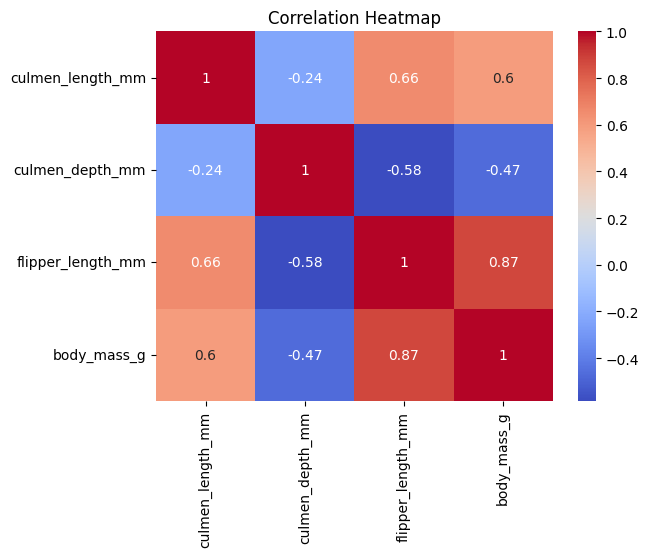

In [11]:
# Multivariate Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Descriptive statistics summary
statistics_summary = data.describe()
print(statistics_summary)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [15]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [16]:
# Handle missing values (e.g., fill with mean, median, or mode)
data.fillna(data.mean(), inplace=True)

<ipython-input-16-ee0c2876837b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


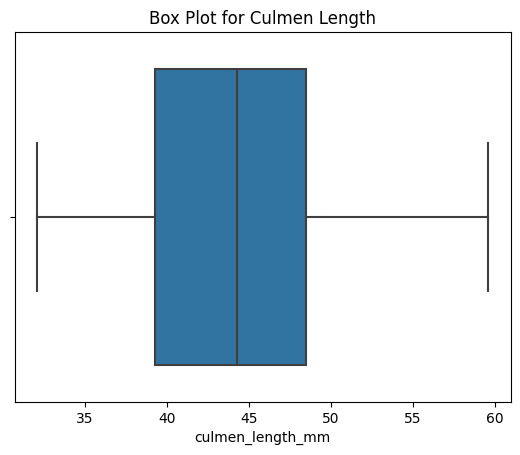

In [17]:
# Find outliers using box plots or other techniques
sns.boxplot(x='culmen_length_mm', data=data)
plt.title('Box Plot for Culmen Length')
plt.show()

# Handle outliers (e.g., remove or replace with a threshold)

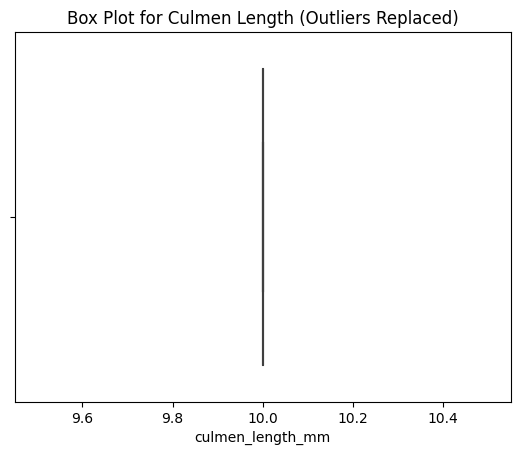

In [44]:
# Define a threshold value (you can adjust this based on your analysis)
threshold = 10  # Adjust this threshold as needed

# Identify outliers and replace them with the threshold value
data['culmen_length_mm'] = data['culmen_length_mm'].apply(lambda x: threshold if x > threshold else x)

# Check the box plot again to visualize the changes
sns.boxplot(x='culmen_length_mm', data=data)
plt.title('Box Plot for Culmen Length (Outliers Replaced)')
plt.show()

In [65]:
# Check correlation of independent variables with the target
correlation_with_target = data.corr()['body_mass_g'].abs().sort_values(ascending=False)
print(correlation_with_target)

body_mass_g          1.000000
flipper_length_mm    0.871202
culmen_depth_mm      0.471916
culmen_length_mm          NaN
Name: body_mass_g, dtype: float64


<ipython-input-65-1bde3e38bcd2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()['body_mass_g'].abs().sort_values(ascending=False)


In [34]:
# Check for categorical columns and perform encoding (e.g., one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

In [36]:
# Split data into dependent (target) and independent (features) variables
X = data_encoded.drop('species', axis=1)
y = data_encoded['species']

In [21]:
from sklearn.preprocessing import StandardScaler

In [48]:
# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
# Check the shape of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (275, 8)
X_test shape: (69, 8)
y_train shape: (275,)
y_test shape: (69,)
